# How many higher education institutions are found in counties with majority underrepresented groups?

## What are the characteristics of those institutions?

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from pathlib import Path

from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'23-Apr-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutional_characteristics.csv
    + processed_data.csv


In [4]:
county_data = pd.read_csv(PROCESSED_DATA / 'counties.csv')

In [5]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [6]:
institutions_data = pd.read_csv(PROCESSED_DATA / 'institutional_characteristics.csv')

In [7]:
institutions_data.head().T

,0,1,2,3,4
institution_name,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
longitude,-108.758,-99.7098,-83.5283,-118.257,-93.2998
latitude,48.4842,32.4689,31.4819,34.1463,44.8557
fips_state_code,Montana,Texas,Georgia,California,Minnesota
total_enrollment,150,5204,4291,217,99
full-time_enrollment,108,3730,2660,194,81
part-time_enrollment,42,1474,1631,23,18
control,Public,Private not-for-profit,Public,Private for-profit,Private for-profit
level,2-year,4-year or above,4-year or above,4-year or above,4-year or above


In [8]:
county_shapes = gpd.read_file(PROCESSED_DATA / 'geodata' / 'tl_2019_us_county.shp')

In [9]:
county_shapes.head().T

,0,1,2,3,4
STATEFP,31,53,35,31,31
COUNTYFP,039,069,011,109,129
COUNTYNS,00835841,01513275,00933054,00835876,00835886
GEOID,31039,53069,35011,31109,31129
NAME,Cuming,Wahkiakum,De Baca,Lancaster,Nuckolls
NAMELSAD,Cuming County,Wahkiakum County,De Baca County,Lancaster County,Nuckolls County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,None,339,None


In [10]:
import us

In [11]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
mask_contiguous_fips = county_shapes['STATEFP'].isin(contiguous_fips)
county_shapes = county_shapes[mask_contiguous_fips]

In [12]:
contiguous_states = [state.name for state in us.STATES_CONTIGUOUS]
mask_contiguous_states = institutions_data['fips_state_code'].isin(contiguous_states)
institutions_data = institutions_data[mask_contiguous_states]

### Majority underrepresented group?? 

In [13]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [14]:
county_data['share_underrepresented'] = (county_data['black_alone'] + 
    county_data['american_indian_and_alaska_native'] + 
    county_data['native_hawaiian_and_pacific_islander'] + 
    county_data['latino_alone']) / county_data['universe']

In [15]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [16]:
subset_county_data = county_data[['geoid', 'name', 'share_underrepresented']].copy()
subset_county_shapes = county_shapes[['GEOID', 'NAME', 'geometry']].copy()

In [17]:
subset_county_data['geoid'] = subset_county_data['geoid'].astype(str).str.zfill(5)

In [18]:
subset_county_data.set_index('geoid', inplace = True)
subset_county_shapes.set_index('GEOID', inplace = True)

In [19]:
working_gdf = subset_county_shapes.join(subset_county_data)

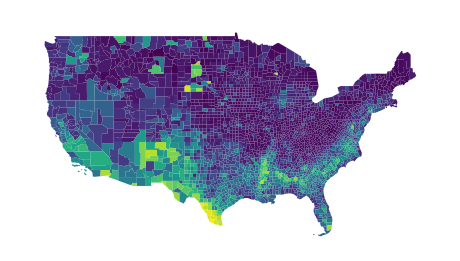

In [20]:
gplt.choropleth(working_gdf, projection = gcrs.WebMercator(), hue = 'share_underrepresented', );

In [21]:
geo_institutions = gpd.GeoDataFrame(institutions_data, geometry = gpd.points_from_xy(institutions_data['longitude'], institutions_data['latitude']))

In [22]:
geo_institutions.crs = working_gdf.crs

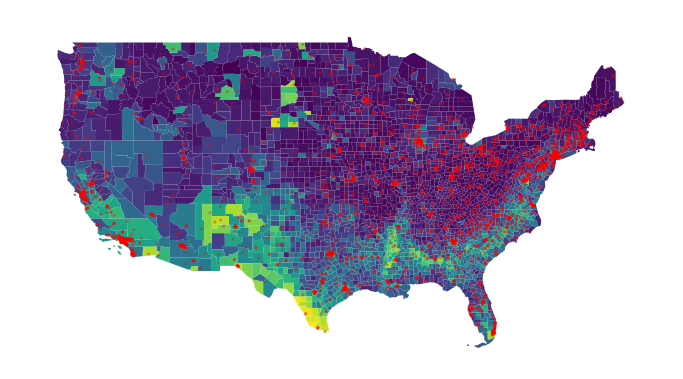

In [23]:
ax = gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue = 'share_underrepresented', figsize=(12,12))
gplt.pointplot(geo_institutions, ax = ax, zorder=3, alpha=.3, color='red', s=2);

1. mask with only majority underrepped counties
2. spatial join institutions WITHIN those counties

In [24]:
mask_majority_underrepresented = working_gdf['share_underrepresented'] > 0.50

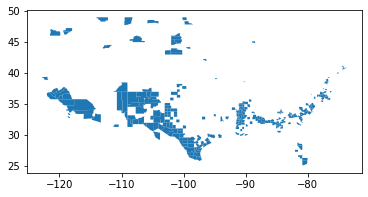

In [25]:
working_gdf[mask_majority_underrepresented].plot();

In [26]:
majority_underrepresented = working_gdf[mask_majority_underrepresented].copy()

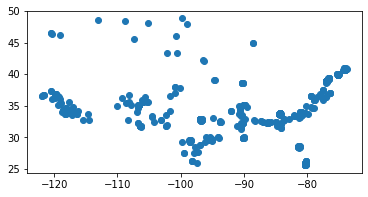

In [27]:
gpd.sjoin(geo_institutions, majority_underrepresented, how='inner', op='intersects').plot();

In [28]:
institutions_in_majority_underrepresented_counties = gpd.sjoin(geo_institutions, majority_underrepresented, how='inner', op='intersects')

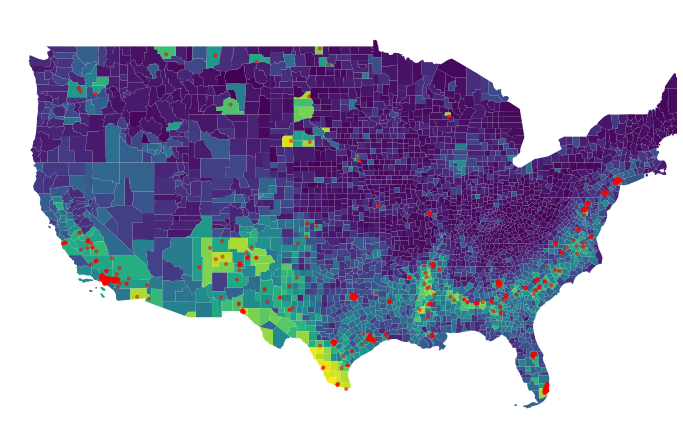

In [29]:
ax = gplt.choropleth(working_gdf, projection=gcrs.WebMercator(), hue = 'share_underrepresented', figsize=(12,12))
gplt.pointplot(institutions_in_majority_underrepresented_counties, ax = ax, zorder=3, alpha=.5, color='red', s=3);

In [30]:
majority_underrepresented.shape

(295, 4)

In [31]:
geo_institutions.shape

(3726, 10)

In [32]:
institutions_in_majority_underrepresented_counties.shape

(671, 14)

In [33]:
institutions_in_majority_underrepresented_counties['control'].value_counts(normalize=True)

Public                    0.384501
Private not-for-profit    0.323398
Private for-profit        0.292101
Name: control, dtype: float64

In [34]:
geo_institutions['control'].value_counts(normalize = True)

Public                    0.428878
Private not-for-profit    0.381911
Private for-profit        0.189211
Name: control, dtype: float64

In [35]:
institutions_in_majority_underrepresented_counties['level'].value_counts(normalize=True)

 4-year or above    0.590164
 2-year             0.409836
Name: level, dtype: float64

In [36]:
geo_institutions['level'].value_counts(normalize = True)

 4-year or above    0.643317
 2-year             0.356683
Name: level, dtype: float64

In [37]:
geo_institutions['total_enrollment'].mean()

5211.410800644815

In [38]:
institutions_in_majority_underrepresented_counties['total_enrollment'].mean()

5497.3288490284

In [39]:
geo_institutions['share_full-time'] = geo_institutions['full-time_enrollment'] / geo_institutions['total_enrollment']
institutions_in_majority_underrepresented_counties['share_full-time'] = institutions_in_majority_underrepresented_counties['full-time_enrollment'] / institutions_in_majority_underrepresented_counties['total_enrollment']

In [40]:
geo_institutions['share_full-time'].mean()

0.6744567999987309

In [41]:
institutions_in_majority_underrepresented_counties['share_full-time'].mean()

0.6911874144129944